# Desc2DTransformer: RDKit descriptors transformer

The descriptors transformer can convert molecules into a list of RDKit descriptors. It largely follows the API of the other transformers, but has a few extra methods and properties to manage the descriptors.

In [1]:
from rdkit import Chem
import numpy as np
import matplotlib.pyplot as plt
from scikit_mol.descriptors import MolecularDescriptorTransformer

After instantiation of the descriptor transformer, we can query which descriptors it found available in the RDKit framework.

In [2]:
descriptor = MolecularDescriptorTransformer()
available_descriptors = descriptor.available_descriptors
print(f"There are {len(available_descriptors)} available descriptors")
print(f"The first five descriptor names: {available_descriptors[:5]}")

There are 209 available descriptors
The first five descriptor names: ['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed']


We can transform molecules to their descriptor profiles

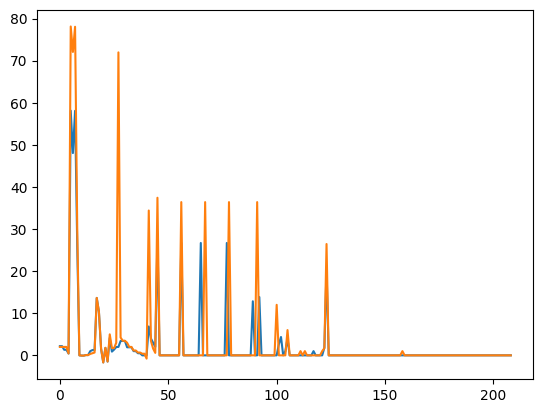

In [3]:
smiles_list = ["CCCC", "c1ccccc1"]
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

features = descriptor.transform(mols)
_ = plt.plot(np.array(features).T)

If we only want some of them, this can be specified at object instantiation.

In [4]:
some_descriptors = MolecularDescriptorTransformer(desc_list=['HeavyAtomCount', 'FractionCSP3', 'RingCount', 'MolLogP', 'MolWt'])
print(f"Selected descriptors are {some_descriptors.selected_descriptors}")
features = some_descriptors.transform(mols)

Selected descriptors are ['HeavyAtomCount', 'FractionCSP3', 'RingCount', 'MolLogP', 'MolWt']


If we want to update the selected descriptors on an already existing object, this can be done via the .set_params() method

In [5]:
print(some_descriptors.set_params(desc_list=['HeavyAtomCount', 'FractionCSP3', 'RingCount']))

MolecularDescriptorTransformer(desc_list=['HeavyAtomCount', 'FractionCSP3',
                                          'RingCount'])
